# 3.1

估计凶杀案发生的时间吗？有点意思

## 3.1.(1)

In [ ]:
import math
t = 2 * math.log(27 / 16, 2)
print(f"t = {t:.2f}") # t = 1.51

t = 1.51


t = 1.51 即，约为1h 30min

死亡时间为 `4:30 am` （6:00 am - t）


## 3.2.(2)

使用解方程的方法

In [23]:
# ===== 导包 ===== 

import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# 微软雅黑
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# ===== 给定已知信息 ===== 

T0 = 37         # 死亡时体温（假设为37℃）
T1 = 26         # 6点尸体温度
T2 = 18         # 8点尸体温度
Te1 = 10        # 6点环境温度
Te2 = 12        # 8点环境温度

dt = 0.01       # 时间步长（小时）

# 猜测初始值
tau0 = 2                     # 初值: 死亡到6点过去了tau0小时
k0 = math.log(2) / 2         # 初值: 体温衰减系数（沿用3.1.(1)的值做初值）

In [ ]:
#  ===== 求解 ===== 

# 线性环境温度变化函数
def T_env(t):
    # t 为距6点的小时数
    return Te1 + (Te2 - Te1) * t / 2

# 微分方程的解形式
# T(t) = T_env(t) + (T0 - T_env(0)) * exp(-k * t0)
# 由于环境温度变化，用数值解更准确

# 模拟尸温变化的函数
def model(temp0, k, t_total, dt = 0.01):
    # temp0: 初始温度
    # k: 冷却常数
    # t_total: 模拟时间长度（小时）
    # dt: 时间步长（小时）
    n = int(t_total / dt) + 1
    t_values = np.linspace(0, t_total, n)
    T = np.zeros(n)
    T[0] = temp0
    # 这里使用欧拉法进行数值积分
    for i in range(1, n):
        Te = T_env(t_values[i])
        T[i] = T[i-1] + (-k * (T[i-1] - Te)) * dt
    return t_values, T

# 误差函数：输入 t (死亡到6点的时间), 输出尸温与26度的误差
def equations(x):
    t0, k = x
    t_sim, T_sim = model(T0, k, t0 + 2, dt)  # 模拟从死亡到8点的全过程
    T_at_6 = np.interp(t0, t_sim, T_sim)
    T_at_8 = np.interp(t0 + 2, t_sim, T_sim)
    return [T_at_6 - T1, T_at_8 - T2]

# 初始猜测：死亡到6点过去了tau0小时，体温衰减系数k0
guess0 = [tau0, k0]
sol = fsolve(equations, guess0)
t0_sol, k_sol = sol

# 生成模拟数据
t_sim, T_sim = model(T0, k_sol, t0_sol + 2, dt)

t_death = 6 - t0_sol  # 死亡时间（小时）
t_death_hour = int(t_death)
t_death_minute = int((t_death - t_death_hour) * 60)

# t_death_hour, t_death_minute, t_sim, T_sim
# 输出死亡时间
print(f"死亡时间：{int(t_death_hour)}点{int(t_death_minute)}分") # 死亡时间：4点46分


死亡时间：4点46分


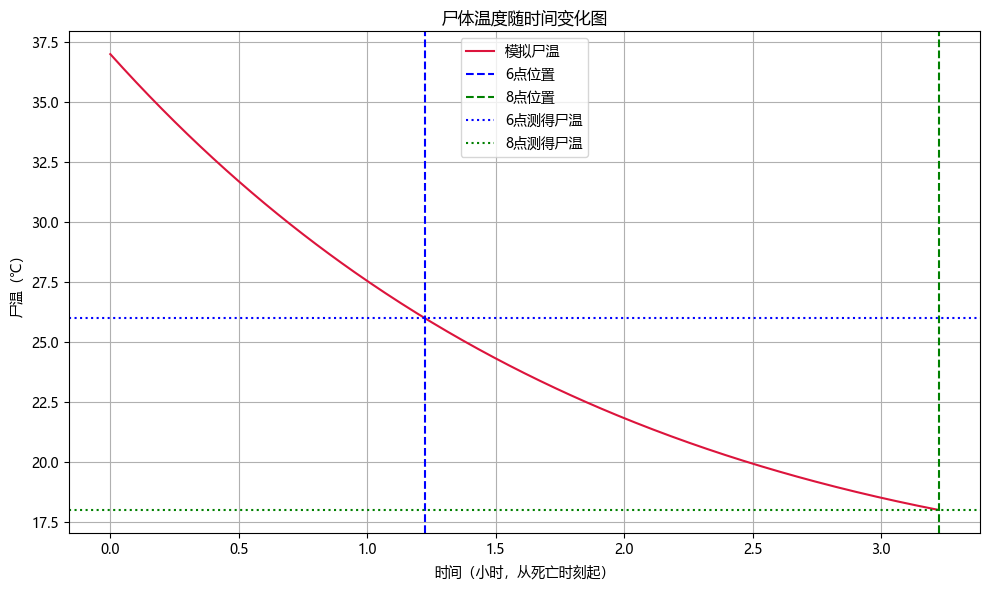

In [26]:
# 绘图展示尸温变化过程
plt.figure(figsize=(10, 6))
plt.plot(t_sim, T_sim, label="模拟尸温", color="crimson")
plt.axvline(x=t0_sol, color='blue', linestyle='--', label="6点位置")
plt.axvline(x=t0_sol + 2, color='green', linestyle='--', label="8点位置")
plt.axhline(y=T1, color='blue', linestyle=':', label="6点测得尸温")
plt.axhline(y=T2, color='green', linestyle=':', label="8点测得尸温")
plt.xlabel("时间（小时，从死亡时刻起）")
plt.ylabel("尸温（℃）")
plt.title("尸体温度随时间变化图")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


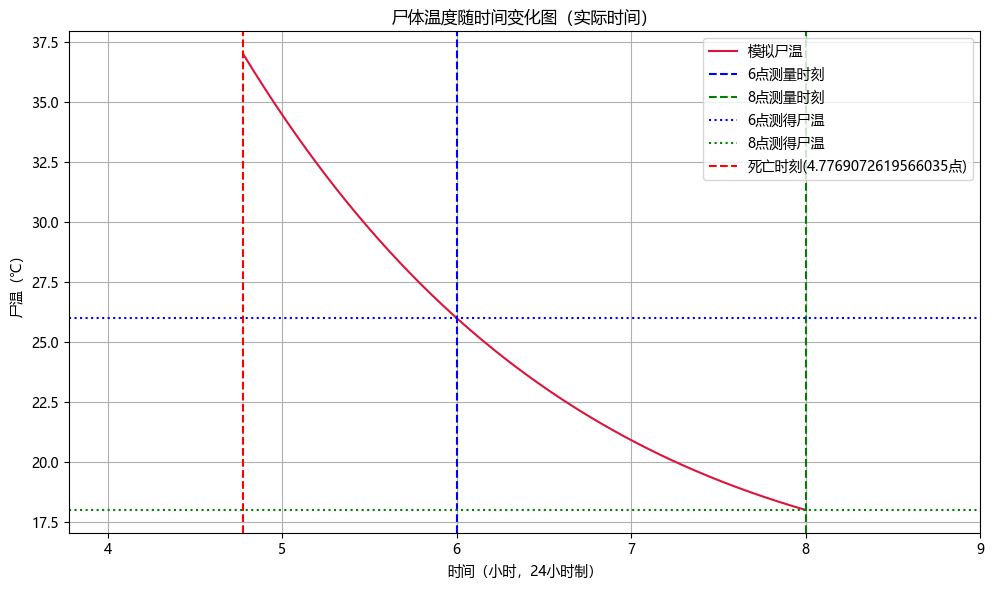

In [ ]:
# 绘图展示尸温变化过程
# 绘图展示尸温变化过程（使用实际时间）
plt.figure(figsize=(10, 6))
# 将模拟时间转换为实际时间（小时）
actual_time = 6 - t0_sol + t_sim  # 从死亡时刻开始的实际时间
plt.plot(actual_time, T_sim, label="模拟尸温", color="crimson")
# 标记6点和8点的位置
plt.axvline(x=6, color='blue', linestyle='--', label="6点测量时刻")
plt.axvline(x=8, color='green', linestyle='--', label="8点测量时刻")
# 标记测量温度
plt.axhline(y=T1, color='blue', linestyle=':', label="6点测得尸温")
plt.axhline(y=T2, color='green', linestyle=':', label="8点测得尸温")
# 标记死亡时间
death_time = 6 - t0_sol
plt.axvline(x=death_time, color='red', linestyle='--', label=f"死亡时刻({death_time:.1f}点)")
plt.xlabel("时间（小时，24小时制）")
plt.ylabel("尸温（℃）")
plt.title("尸体温度随时间变化图（实际时间）")
plt.legend()
plt.grid(True)
plt.tight_layout()
# 设置x轴范围，从死亡前到8点后
plt.xlim([death_time - 1, 9])
plt.show()

使用优化的方法

作业的文中没提

In [28]:
import numpy as np
from scipy.optimize import minimize

# 已知数据
t_data = np.array([0, 2])  # 早晨6时为0，早晨8时为2
T_data = np.array([26, 18])  # 尸温
T_env_data = np.array([10, 12])  # 室温

# 定义模型：牛顿冷却定律，室温线性变化
def model(t, k, tau):
    # 死亡时间 t_death = -tau
    # 室温函数：T_env(t) = 10 + t (早晨6时为0)
    # 初始条件：T(-tau) = 37
    # 解微分方程 dT/dt = -k (T - (10 + t))
    # 解的形式：T(t) = (37 - (10 - tau + 1/k)) * exp(-k (t + tau)) + 10 + t - 1/k
    # 但需要验证
    # 更简单：数值积分
    T = np.zeros_like(t)
    for i, ti in enumerate(t):
        if ti >= -tau:
            # 从 -tau 到 ti 积分
            # 使用欧拉方法
            steps = 1000
            time_points = np.linspace(-tau, ti, steps)
            T_current = 37.0
            for t_step in time_points[1:]:
                dt = t_step - time_points[np.where(time_points == t_step)[0][0] - 1]
                T_env = 10 + t_step
                dTdt = -k * (T_current - T_env)
                T_current += dTdt * dt
            T[i] = T_current
        else:
            T[i] = 37.0  # 死亡前
    return T

# 定义损失函数
def loss(params):
    k, tau = params
    T_pred = model(t_data, k, tau)
    return np.sum((T_pred - T_data)**2)

# 初始猜测
k_guess = 0.36
tau_guess = 1.4
initial_guess = [k_guess, tau_guess]

# 优化
result = minimize(loss, initial_guess, bounds=[(0.001, 10), (0.001, 24)])
k_opt, tau_opt = result.x

print(f"Optimal k: {k_opt:.4f} / hour")
print(f"Optimal tau: {tau_opt:.4f} hours")

# 计算死亡时间
death_time_hours = -tau_opt
death_time = 6 + death_time_hours  # 早晨6时前
death_hour = int(np.floor(death_time))
death_minute = int((death_time - death_hour) * 60)
print(f"Death time: {death_hour}:{death_minute:02d}")

# 验证模型
T_pred = model(t_data, k_opt, tau_opt)
print(f"Predicted T at t=0: {T_pred[0]:.2f}°C (actual: 26°C)")
print(f"Predicted T at t=2: {T_pred[1]:.2f}°C (actual: 18°C)")

# 计算尸温为37°C的时间
# 尸温从37°C下降到26°C用了tau小时
print(f"Time from death to 6am: {tau_opt:.2f} hours")

Optimal k: 0.3600 / hour
Optimal tau: 1.4000 hours
Death time: 4:35
Predicted T at t=0: 26.00°C (actual: 26°C)
Predicted T at t=2: 18.00°C (actual: 18°C)
Time from death to 6am: 1.40 hours
